In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Charter"

In [36]:
hpa = [720532, 651635, 624297,   2330, 743014, 588855, 743012, 624296,
       743015,   1578, 504444, 651744]
lpa = [720582, 602340, 720635,1531,1688,2642,651610,588852,624466,1822,624256,777,2553,938,720648,651658,504660,2540,2216,504582,485270,2599,504847,624202,588334,2796,2156,485313,504333,588458,932,504652,894,1458,720504,504466,485314,1529,2098,1030]
df = pd.read_csv("df_goterms.csv", index_col=None)
df.columns

Index(['AID', 'hierarchy', 'GOTERM', 'Description'], dtype='object')

In [75]:
allassays = ["1030",
"1458",
"1529",
"1531",
"1578",
"1688",
"1822",
"2098",
"2156",
"2216",
"2330",
"2540",
"2553",
"2599",
"2642",
"2796",
"485270",
"485313",
"485314",
"504333",
"504444",
"504466",
"504582",
"504652",
"504660",
"504847",
"588334",
"588458",
"588852",
"588855",
"602340",
"624202",
"624256",
"624296",
"624297",
"624466",
"651610",
"651635",
"651658",
"651744",
"720504",
"720532",
"720582",
"720635",
"720648",
"743012",
"743014",
"743015",
"777",
"894",
"932",
"938"]


['1030',
 '1458',
 '1529',
 '1531',
 '1578',
 '1688',
 '1822',
 '2098',
 '2156',
 '2216',
 '2330',
 '2540',
 '2553',
 '2599',
 '2642',
 '2796',
 '485270',
 '485313',
 '485314',
 '504333',
 '504444',
 '504466',
 '504582',
 '504652',
 '504660',
 '504847',
 '588334',
 '588458',
 '588852',
 '588855',
 '602340',
 '624202',
 '624256',
 '624296',
 '624297',
 '624466',
 '651610',
 '651635',
 '651658',
 '651744',
 '720504',
 '720532',
 '720582',
 '720635',
 '720648',
 '743012',
 '743014',
 '743015',
 '777',
 '894',
 '932',
 '938']

In [80]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2))))

Diff(allassays,lpa)

['1822',
 '720532',
 '2599',
 '485314',
 '504333',
 '720635',
 '720582',
 '720648',
 '743012',
 '651658',
 '485270',
 '2642',
 '588458',
 '504660',
 '485313',
 '602340',
 '624296',
 '894',
 '2156',
 '1531',
 '504444',
 '651610',
 '720504',
 '504652',
 '588852',
 '588855',
 '504466',
 '777',
 '1458',
 '2796',
 '624466',
 '504582',
 '651635',
 '1578',
 '2553',
 '1688',
 '2216',
 '624256',
 '651744',
 '2330',
 '2098',
 '624202',
 '504847',
 '743015',
 '588334',
 '2540',
 '624297',
 '938',
 '1030',
 '743014',
 '1529',
 '932']

In [58]:
sparse_matrix = pd.DataFrame(index=df.AID.unique(), columns=df.GOTERM.unique())

for i,j in df.groupby('GOTERM'):
    for aid in df.AID:
        sparse_matrix.loc[aid,i]=float(aid in j.AID.to_list())

Text(0.5, 1.0, 'Phenotypic Annotations for each Bioassay')

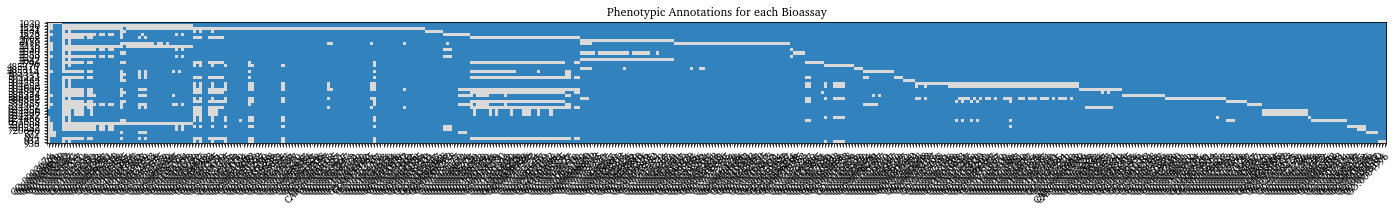

In [66]:
sparse_matrix

plt.figure(figsize=[24,40])

im = plt.imshow(sparse_matrix.values.astype('int'),interpolation='none',aspect='equal',cmap='tab20c') # 'summer' 'RdBu' 'Spectral' 'seismic'tab10 tab20 tab20c with black lines

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(sparse_matrix.shape[1]))
ax.set_yticks(np.arange(sparse_matrix.shape[0]))

# Labels for major ticks
ax.set_xticklabels(sparse_matrix.columns.to_list())
ax.set_yticklabels(sparse_matrix.index.to_list())

# Minor ticks
ax.set_xticks(np.arange(-.5, sparse_matrix.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, sparse_matrix.shape[0], 1), minor=True)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title('Phenotypic Annotations for each Bioassay')
# Gridlines based on minor ticks
# ax.grid(which='minor', color='black', linestyle='-', linewidth=.52)
# plt.savefig('../_output/phenotypic_annotations.svg',bbox_inches='tight')
# plt.savefig('../_output/phenotypic_annotations.png',bbox_inches='tight')
# plt.savefig('../_output/phenotypic_annotations.pdf',bbox_inches='tight')

In [16]:
df_hpa = df.query('AID == @hpa')
df_lpa = df.query('AID == @lpa')

In [17]:
df_lpa = df_lpa.drop_duplicates(["AID", "GOTERM"])
df_hpa = df_hpa.drop_duplicates(["AID", "GOTERM"])

In [18]:
df_hpa.GOTERM.to_list()

['GO:0008150',
 'GO:0065007',
 'GO:0009987',
 'GO:0050789',
 'GO:0008219',
 'GO:0050794',
 'GO:0012501',
 'GO:0010941',
 'GO:0006915',
 'GO:0043067',
 'GO:0042981',
 'GO:0003674',
 'GO:0005488',
 'GO:0005515',
 'GO:0008150',
 'GO:0008152',
 'GO:0009987',
 'GO:0006807',
 'GO:0071704',
 'GO:0044237',
 'GO:0043170',
 'GO:1901564',
 'GO:0044238',
 'GO:0044260',
 'GO:0043412',
 'GO:0006793',
 'GO:0019538',
 'GO:0044267',
 'GO:0006796',
 'GO:0036211',
 'GO:0006464',
 'GO:0016310',
 'GO:0006468',
 'GO:0005488',
 'GO:0003674',
 'GO:1901265',
 'GO:0036094',
 'GO:0097367',
 'GO:0000166',
 'GO:1901363',
 'GO:0043167',
 'GO:0097159',
 'GO:0017076',
 'GO:0032553',
 'GO:0030554',
 'GO:0043168',
 'GO:0032555',
 'GO:0032559',
 'GO:0035639',
 'GO:0005524',
 'GO:0003824',
 'GO:0016740',
 'GO:0018215',
 'GO:0016772',
 'GO:0140096',
 'GO:0016301',
 'GO:0016773',
 'GO:0004672',
 'GO:0044237',
 'GO:0008152',
 'GO:0006807',
 'GO:0071704',
 'GO:0008150',
 'GO:0006725',
 'GO:0044249',
 'GO:0034641',
 'GO:00464

In [31]:
hpa_terms = df_hpa.GOTERM.value_counts().index
hpa_counts = df_hpa.GOTERM.value_counts().values

lpa_terms = df_lpa.GOTERM.value_counts().index
lpa_counts = df_lpa.GOTERM.value_counts().values
hpa_terms,hpa_counts

(Index(['GO:0008150', 'GO:0009987', 'GO:0050794', 'GO:0065007', 'GO:0050789',
        'GO:0044237', 'GO:0071704', 'GO:0043170', 'GO:0008152', 'GO:0044260',
        ...
        'GO:0070848', 'GO:0006464', 'GO:0035639', 'GO:0003700', 'GO:0097367',
        'GO:0016740', 'GO:0023052', 'GO:0033554', 'GO:0008219', 'GO:0036211'],
       dtype='object', length=133),
 array([6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

In [20]:
lpa_descr = []
lpa_min_hier = []
lpa_max_hier = []

for i in lpa_terms:
    # get the maximal hierarchy level for the GO term in low performing assasys
    lpa_max_hier.append(df.query('GOTERM == @i').iloc[:,1].max())
    lpa_min_hier.append(df.query('GOTERM == @i').iloc[:,1].min())
    lpa_descr.append(df.query('GOTERM == @i').iloc[0,-1])

hpa_descr = []
hpa_min_hier = []
hpa_max_hier = []

for i in hpa_terms:
    hpa_max_hier.append(df.query('GOTERM == @i').iloc[:,1].max())
    hpa_min_hier.append(df.query('GOTERM == @i').iloc[:,1].min())
    hpa_descr.append(df.query('GOTERM == @i').iloc[0,-1])

In [21]:
df_lpa_info = pd.DataFrame(lpa_terms, columns=['terms'])
df_lpa_info['counts'] = lpa_counts
df_lpa_info['max_hier'] = lpa_max_hier
df_lpa_info['min_hier'] = lpa_min_hier
df_lpa_info['descr'] = lpa_descr
df_lpa_info.shape

(412, 5)

In [22]:
df_hpa_info = pd.DataFrame(hpa_terms, columns=['terms'])
df_hpa_info['counts'] = hpa_counts
df_hpa_info['max_hier'] = hpa_max_hier
df_hpa_info['min_hier'] = hpa_min_hier
df_hpa_info['descr'] = hpa_descr
df_hpa_info
# GO terms that are not too abundant and not too rare
#df_hpa_info.query('min_hier > 5 & counts > 2')

#df_hpa_rel = df_hpa_info.query('min_hier > 5 & counts > 2')
#df_hpa_rel.shape

,terms,counts,max_hier,min_hier,descr
0,GO:0008150,6,13,1,biological_process
1,GO:0009987,6,17,5,cellular_process
2,GO:0050794,5,21,5,regulation_of_cellular_process
3,GO:0065007,5,21,1,biological_regulation
4,GO:0050789,5,17,1,regulation_of_biological_process
...,...,...,...,...,...
128,GO:0016740,1,29,9,transferase_activity
129,GO:0023052,1,29,9,signaling
130,GO:0033554,1,17,13,cellular_response_to_stress
131,GO:0008219,1,13,13,cell_death


In [23]:
df_compare = pd.merge(left=df_hpa_info, right=df_lpa_info, on='terms', how='right', suffixes=['_hpa','_lpa']).drop(axis=1,labels='descr_hpa')

In [24]:
df_compare['counts_hpa'] = df_compare['counts_hpa'].fillna(0)
df_compare['max_hier_hpa'] = df_compare['max_hier_hpa'].fillna(0)
df_compare['min_hier_hpa'] = df_compare['min_hier_hpa'].fillna(0)
df_compare['freq_hpa'] = df_compare['counts_hpa']/df_hpa.AID.unique().shape[0]
df_compare['freq_lpa'] = df_compare['counts_lpa']/df_lpa.AID.unique().shape[0]
df_compare.loc[:,['freq_hpa','freq_lpa','descr_lpa']]

,freq_hpa,freq_lpa,descr_lpa
0,0.666667,1.000000,molecular_function
1,1.000000,0.882353,biological_process
2,1.000000,0.852941,cellular_process
3,0.666667,0.558824,binding
4,0.833333,0.500000,macromolecule_metabolic_process
...,...,...,...
407,0.000000,0.029412,unfolded_protein_binding
408,0.000000,0.029412,regulation_of_body_fluid_levels
409,0.000000,0.029412,thyroid-stimulating_hormone_signaling_pathway
410,0.000000,0.029412,positive_regulation_of_phosphorus_metabolic_pr...


In [25]:
df_test = pd.merge(left=df_hpa_info, right=df_lpa_info, on='terms', how='outer', suffixes=['_hpa','_lpa'])

df_test['counts_hpa'] = df_test['counts_hpa'].fillna(0)
df_test['max_hier_hpa'] = df_test['max_hier_hpa'].fillna(0)
df_test['min_hier_hpa'] = df_test['min_hier_hpa'].fillna(0)

df_test['counts_lpa'] = df_test['counts_lpa'].fillna(0)
df_test['max_hier_lpa'] = df_test['max_hier_lpa'].fillna(0)
df_test['min_hier_lpa'] = df_test['min_hier_lpa'].fillna(0)

df_test['freq_hpa'] = df_test['counts_hpa']/df_hpa.AID.unique().shape[0]
df_test['freq_lpa'] = df_test['counts_lpa']/df_lpa.AID.unique().shape[0]

# only include go terms that are found more than one time in total
df_test = df_test.query('counts_hpa+counts_lpa > 1')

df_test.shape

(233, 11)

'Charter Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


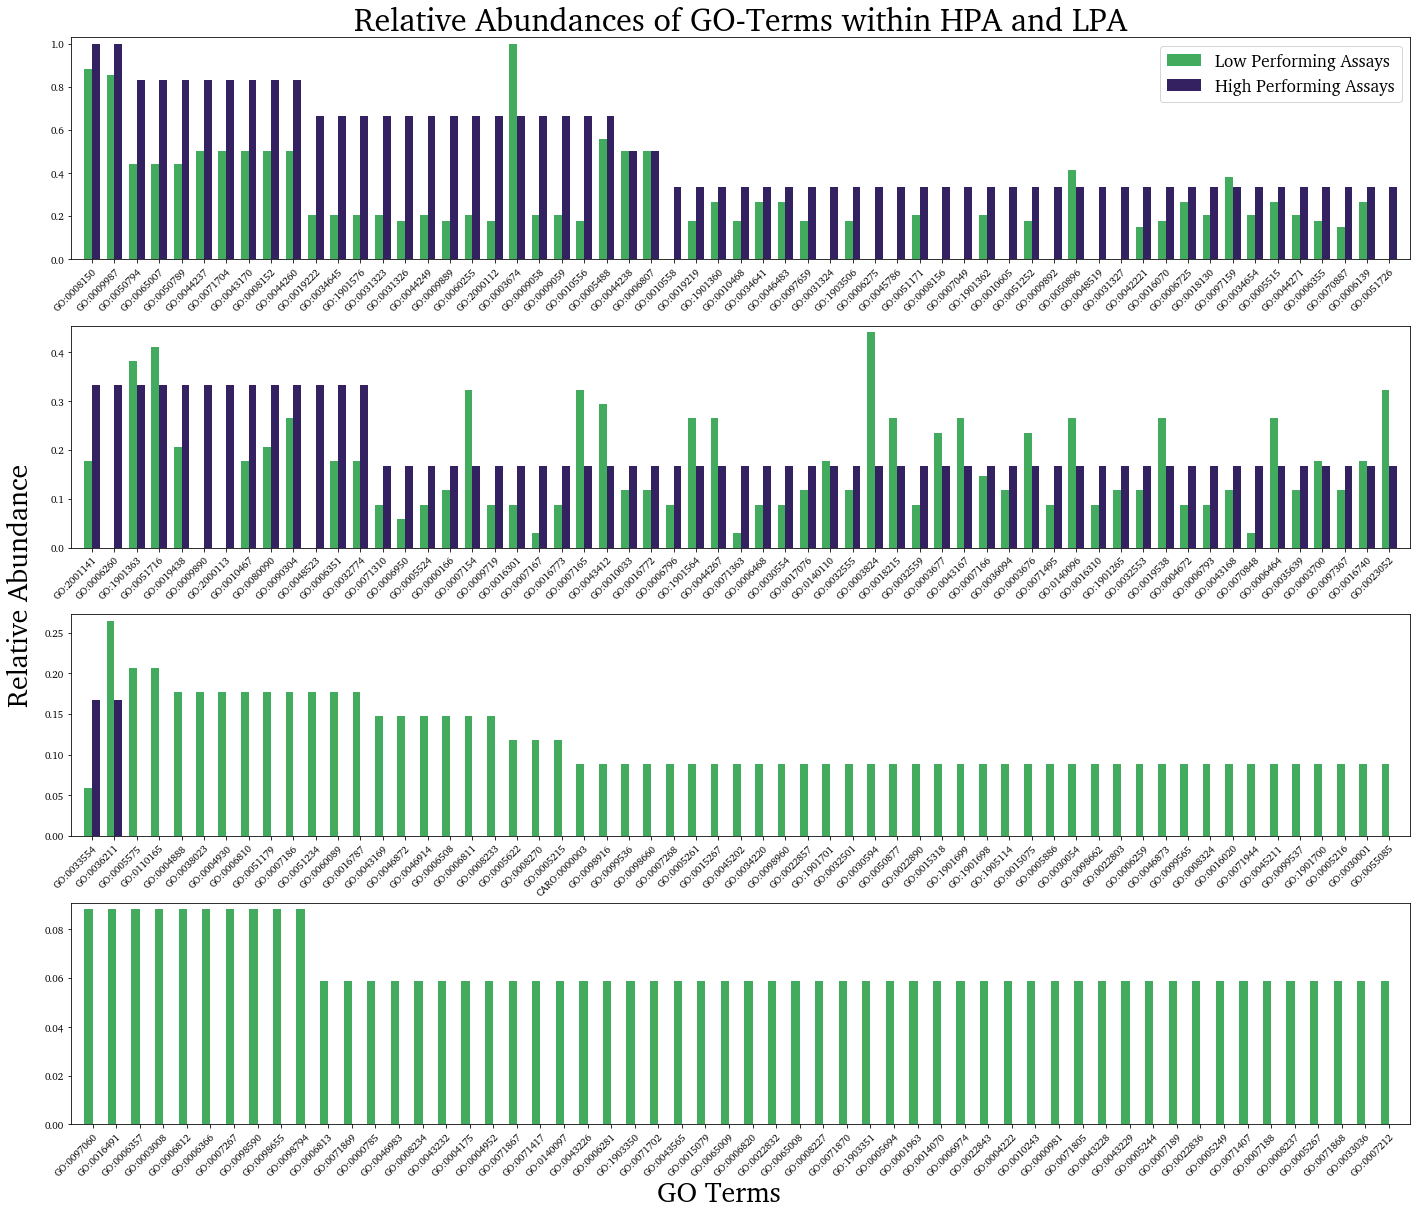

In [26]:
quarter1 = math.ceil(df_test.shape[0]/4)
quarter2 = 2 * math.ceil(df_test.shape[0]/4)
quarter3 = 3 * math.ceil(df_test.shape[0]/4)


labels1 = df_test.terms.to_list()[:quarter1]
labels2 = df_test.terms.to_list()[quarter1:quarter2]
labels3 = df_test.terms.to_list()[quarter2:quarter3]
labels4 = df_test.terms.to_list()[quarter3:]

x = np.arange(len(labels1))  # the label locations
x4 = np.arange(len(labels4))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,num=49254,figsize=(24,20))
rects1 = ax1.bar(x - width/2, df_test.iloc[:quarter1,-1].values, width,color='#42ab5eff', label='Low Performing Assays')
rects2 = ax1.bar(x + width/2, df_test.iloc[:quarter1,-2].values, width,color='#332161ff', label='High Performing Assays')
rects3 = ax2.bar(x - width/2, df_test.iloc[quarter1:quarter2,-1].values, width,color='#42ab5eff', label='lpa')
rects4 = ax2.bar(x + width/2, df_test.iloc[quarter1:quarter2,-2].values, width,color='#332161ff', label='hpa')
rects5 = ax3.bar(x - width/2, df_test.iloc[quarter2:quarter3,-1].values, width,color='#42ab5eff', label='lpa')
rects6 = ax3.bar(x + width/2, df_test.iloc[quarter2:quarter3,-2].values, width,color='#332161ff', label='hpa')
rects7 = ax4.bar(x4 - width/2, df_test.iloc[quarter3:,-1].values, width,color='#42ab5eff', label='lpa')
rects8 = ax4.bar(x4 + width/2, df_test.iloc[quarter3:,-2].values, width,color='#332161ff', label='hpa')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_title('Relative Abundances of GO-Terms within HPA and LPA',fontsize=32)
ax1.set_xticks(x)
ax1.set_xticklabels(labels1)
ax2.set_xticks(x)
ax2.set_xticklabels(labels2)
ax3.set_xticks(x)
ax3.set_xticklabels(labels3)
ax4.set_xticks(x4)
ax4.set_xticklabels(labels4)


plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax4.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax1.margins(0.01, 0.03)
ax2.margins(0.01, 0.03)
ax3.margins(0.01, 0.03)
ax4.margins(0.01, 0.03)

ax1.legend(fontsize = 'xx-large')
fig.text(0.088, 0.5, 'Relative Abundance', va='center', rotation='vertical',fontsize=28)
fig.text(0.5, 0.072, 'GO Terms', ha='center',fontsize=28)
plt.subplots_adjust(wspace=0, hspace=0.3)

plt.savefig('../_output/go_frequencies.svg')
plt.savefig('../_output/go_frequencies.png')
plt.savefig('../_output/go_frequencies.pdf',bbox_inches='tight')

plt.show()

In [27]:
df_test

,terms,counts_hpa,max_hier_hpa,min_hier_hpa,descr_hpa,counts_lpa,max_hier_lpa,min_hier_lpa,descr_lpa,freq_hpa,freq_lpa
0,GO:0008150,6.0,13.0,1.0,biological_process,30.0,13.0,1.0,biological_process,1.000000,0.882353
1,GO:0009987,6.0,17.0,5.0,cellular_process,29.0,17.0,5.0,cellular_process,1.000000,0.852941
2,GO:0050794,5.0,21.0,5.0,regulation_of_cellular_process,15.0,21.0,5.0,regulation_of_cellular_process,0.833333,0.441176
3,GO:0065007,5.0,21.0,1.0,biological_regulation,15.0,21.0,1.0,biological_regulation,0.833333,0.441176
4,GO:0050789,5.0,17.0,1.0,regulation_of_biological_process,15.0,17.0,1.0,regulation_of_biological_process,0.833333,0.441176
...,...,...,...,...,...,...,...,...,...,...,...
241,GO:0008237,0.0,0.0,0.0,NaN,2.0,37.0,37.0,metallopeptidase_activity,0.000000,0.058824
242,GO:0005267,0.0,0.0,0.0,NaN,2.0,37.0,33.0,potassium_channel_activity,0.000000,0.058824
243,GO:0071868,0.0,0.0,0.0,NaN,2.0,17.0,17.0,cellular_response_to_monoamine_stimulus,0.000000,0.058824
244,GO:0033036,0.0,0.0,0.0,NaN,2.0,17.0,13.0,macromolecule_localization,0.000000,0.058824


In [28]:
hpa_descriptions = df_test.query('freq_hpa > freq_lpa & counts_hpa > 1 & min_hier_hpa > 1').descr_hpa.to_list()
lpa_descriptions = df_test.query('freq_hpa < freq_lpa & counts_lpa > 1 & min_hier_lpa > 1').descr_lpa.to_list()

In [29]:
len(hpa_descriptions)

55